<div class="alert alert-warning">
    
<b>Disclaimer:</b> 
    
The main objective of the <i>Jupyter</i> notebooks is to show how to use the models of the <i>QENS library</i> by
    
- building a fitting model: composition of models, convolution with a resolution function  
- setting and running the fit  
- extracting and displaying information about the results  

These steps have a minimizer-dependent syntax. That's one of the reasons why different minimizers have been used in the notebooks provided as examples.  
But, the initial guessed parameters might not be optimal, resulting in a poor fit of the reference data.

</div>

# Gaussian Model 3D with lmfit

## Table of Contents

- [Introduction](#Introduction)
- [Importing the required libraries](#Importing-the-required-libraries)
- [Plot of the fitting model](#Plot-of-the-fitting-model)
- [Creating the reference data](#Creating-the-reference-data)
- [Setting and fitting](#Setting-and-fitting) 
- [Plotting the results](#Plotting-the-results) 

[Top](#Table-of-Contents)

## Introduction

<div class="alert alert-info">
    
The objective of this notebook is to show how to use the <b>Gaussian Model 3D</b> model to perform some 
fits using <a href="https://lmfit.github.io/lmfit-py/">lmfit</a>.
</div>

[Top](#Table-of-Contents)

## Importing the required librairies

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import ipywidgets

In [3]:
# install QENSmodels (if not already installed)
import pkgutil
import sys

if not pkgutil.find_loader("QENSmodels"):
    buttonY = ipywidgets.Button(description='Yes', button_style='success')
    buttonN = ipywidgets.Button(description='No', button_style='danger')
    choice_installation = ipywidgets.VBox(
    [ipywidgets.Label("Do you want to install the QENSmodels' library?"), ipywidgets.HBox([buttonY, buttonN])],
    layout=ipywidgets.Layout(width='50%', height='80px'))
    display(choice_installation)
    
    def on_buttonY_clicked(b):
        !{sys.executable} -m pip install git+https://github.com/QENSlibrary/QENSmodels#egg=QENSmodels

    def on_buttonN_clicked(b):
        print("You will not be able to run some of the remaining parts of this notebook")
     
    buttonY.on_click(on_buttonY_clicked)
    buttonN.on_click(on_buttonN_clicked) 

In [4]:
# install lmfit (if not already installed)
if not pkgutil.find_loader("lmfit"):   
    lmfitY = ipywidgets.Button(description='Yes', button_style='success')
    lmfitN = ipywidgets.Button(description='No', button_style='danger')
    choice_installation = ipywidgets.VBox(
    [ipywidgets.Label("Do you want to install lmfit?"), ipywidgets.HBox([lmfitY, lmfitN])],
    layout=ipywidgets.Layout(width='30%', height='80px'))

    display(choice_installation)
    
    def on_lmfitY_clicked(b):
        !{sys.executable} -m pip install lmfit
    def on_lmfitN_clicked(b):
        print("You will not be able to run some of the remaining parts of this notebook")
        
    lmfitY.on_click(on_lmfitY_clicked)
    lmfitN.on_click(on_lmfitN_clicked) 

In [5]:
# required imports from lmfit
from lmfit import Model

# import model from QENS library
import QENSmodels

### Physical units
For information about unit conversion, please refer to the jupyter notebook called `Convert_units.ipynb` in the `tools` folder.

The dictionary of units defined in the cell below specify the units of the refined parameters adapted to the convention used in the experimental datafile.

In [6]:
# Units of parameters for selected QENS model and experimental data
dict_physical_units = {'omega': "meV",
                       'q': "1/Angstrom",
                       'D': "meV.Angstrom^2",
                       'variance_ux': "Angstrom",
                       'scale': "unit_of_signal.meV",
                       'center': "meV"}

[Top](#Table-of-Contents)

## Plot of the fitting model

The widget below shows the peak shape function imported from QENSmodels where the function's parameters can be varied.

In [7]:
# Dictionary of initial values
ini_parameters = {'q': 1., 'scale': 5., 'center': 0., 'D': 1., 'variance_ux': 1.}

def interactive_fct(q, scale, center, D, variance_ux):
    xs = np.linspace(-10, 10, 100)
    
    fig1, ax1 = plt.subplots()
    ax1.plot(xs, QENSmodels.sqwGaussianModel3D(xs, q, scale, center, D, variance_ux))
    ax1.set_xlabel('x')
    ax1.grid()

# Define sliders for modifiable parameters and their range of variations

q_slider = ipywidgets.FloatSlider(value=ini_parameters['q'],
                                  min=0.1, max=10., step=0.1,
                                  description='q', 
                                  continuous_update=False) 

scale_slider = ipywidgets.FloatSlider(value=ini_parameters['scale'],
                                      min=0.1, max=10, step=0.1,
                                      description='scale',
                                      continuous_update=False) 

center_slider = ipywidgets.IntSlider(value=ini_parameters['center'],
                                     min=-10, max=10, step=1,
                                     description='center', 
                                     continuous_update=False) 

D_slider = ipywidgets.FloatSlider(value=ini_parameters['D'],
                                     min=0.1, max=10, step=0.1,
                                     description='D',
                                     continuous_update=False)

variance_ux_slider = ipywidgets.FloatSlider(value=ini_parameters['variance_ux'],
                                       min=0.1, max=10, step=0.1,
                                       description='variance_ux',
                                       continuous_update=False)

grid_sliders = ipywidgets.HBox([ipywidgets.VBox([q_slider, scale_slider, center_slider])
                                ,ipywidgets.VBox([D_slider, variance_ux_slider])])

# Define function to reset all parameters' values to the initial ones
def reset_values(b):
    """Reset the interactive plots to inital values."""
    q_slider.value = ini_parameters['q'] 
    scale_slider.value = ini_parameters['scale'] 
    center_slider.value = ini_parameters['center']  
    D_slider.value = ini_parameters['D'] 
    variance_ux_slider.value = ini_parameters['variance_ux'] 

# Define reset button and occurring action when clicking on it
reset_button = ipywidgets.Button(description = "Reset")
reset_button.on_click(reset_values)

# Display the interactive plot
interactive_plot = ipywidgets.interactive_output(interactive_fct,       
                                         {'q': q_slider, 
                                          'scale': scale_slider,
                                          'center': center_slider,
                                          'D': D_slider,
                                          'variance_ux': variance_ux_slider})  
                                            
display(grid_sliders, interactive_plot, reset_button)

Output()

Button(description='Reset', style=ButtonStyle())

[Top](#Table-of-Contents)

## Creating the reference data

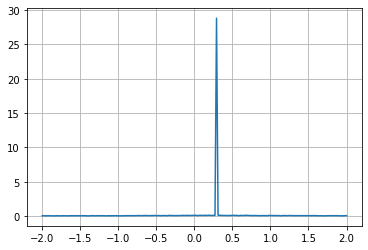

In [8]:
nb_points = 200
xx = np.linspace(-2, 2, nb_points)
added_noise = 0.1 * np.random.normal(0, 1, nb_points)

gaussian_model_3d_noisy = QENSmodels.sqwGaussianModel3D(xx,
                                                        q=.5,
                                                        scale=0.7,
                                                        center=0.3,
                                                        D=1,
                                                        variance_ux=1.2) * (1 + added_noise)
gaussian_model_3d_noisy += 0.1 * added_noise

# plot initial mode
fig0, ax0 = plt.subplots()
ax0.plot(xx, gaussian_model_3d_noisy)
ax0.grid();

[Top](#Table-of-Contents)

## Setting and fitting

In [9]:
gmodel = Model(QENSmodels.sqwGaussianModel3D)

print('Names of parameters:', gmodel.param_names)
print('Independent variable(s):', gmodel.independent_vars)

initial_parameters_values = [1.22, 0.25, .3, 0.33]

# Define boundaries for parameters to be refined
gmodel.set_param_hint('scale', min=0)
gmodel.set_param_hint('center', min=-5, max=5)
gmodel.set_param_hint('D', min=0)
gmodel.set_param_hint('variance_ux', min=0)

# Fix some of the parameters
gmodel.set_param_hint('q', vary=False)

# Fit
result = gmodel.fit(gaussian_model_3d_noisy,
                    w=xx,
                    q=1.,
                    scale=initial_parameters_values[0],
                    center=initial_parameters_values[1],
                    D=initial_parameters_values[2],
                    variance_ux=initial_parameters_values[3])

Names of parameters: ['q', 'scale', 'center', 'D', 'variance_ux']
Independent variable(s): ['w']


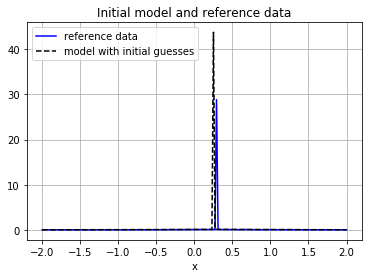

In [10]:
# Plot Initial model and reference data
fig1, ax1 = plt.subplots()
ax1.plot(xx, gaussian_model_3d_noisy, 'b-', label='reference data')
ax1.plot(xx, result.init_fit, 'k--', label='model with initial guesses')
ax1.set(xlabel='x', title='Initial model and reference data')
ax1.grid()
ax1.legend();

[Top](#Table-of-Contents)

## Plotting results

using methods implemented in `lmfit`

In [11]:
# display result
print('Result of fit:\n', result.fit_report())

Result of fit:
 [[Model]]
    Model(sqwGaussianModel3D)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 200
    # variables        = 4
    chi-square         = 825.149657
    reduced chi-square = 4.20994723
    Akaike info crit   = 291.449481
    Bayesian info crit = 304.642751
[[Variables]]
    q:            1 (fixed)
    scale:        14.0921306 +/- 3969.48109 (28168.07%) (init = 1.22)
    center:       4.99978621 +/- 33604.9710 (672128.16%) (init = 0.25)
    D:            26.3551858 +/- 47596.1432 (180594.98%) (init = 0.3)
    variance_ux:  9.25262671 +/- 92942.6075 (1004499.70%) (init = 0.33)
[[Correlations]] (unreported correlations are < 0.100)
    C(center, variance_ux) = -0.999
    C(D, variance_ux)      = -0.998
    C(center, D)           =  0.993
    C(scale, center)       = -0.865
    C(scale, variance_ux)  =  0.840
    C(scale, D)            = -0.800


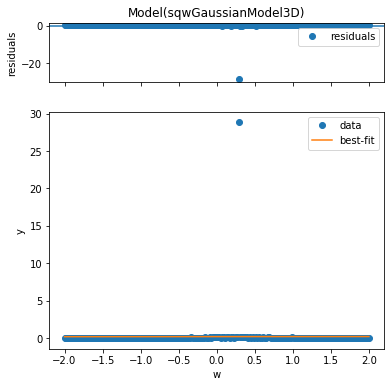

In [12]:
# plot fitting results using lmfit functionality
result.plot();

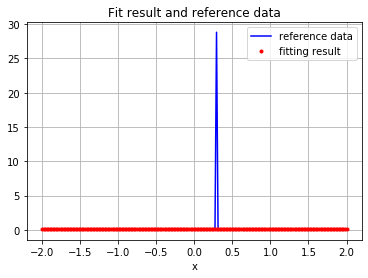

In [13]:
# plot fitting results and reference data using matplotlib.pyplot
fig2, ax2 = plt.subplots()
ax2.plot(xx, gaussian_model_3d_noisy, 'b-', label='reference data')
ax2.plot(xx, result.best_fit, 'r.', label='fitting result')
ax2.legend()
ax2.set(xlabel='x', title='Fit result and reference data')
ax2.grid();